In [1]:
import os
import h5py
import pylab
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

################################################################################
#
#    PLOTTING OPTIONS
#
################################################################################


# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [3]:
time = np.arange(-5,11,1)

In [4]:
time

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [5]:
lnb_330={}
lnb_220={}
lnb_440={}
lnb_221={}

In [6]:
for t in time:
    if t<0:
        name = 'M'+str(-t)+'MS'
    else:
        name = str(t)+'MS'
    try:
        f220=h5py.File('./220/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW200224_'+name+'-1126259200-400.hdf','r')
        f330=h5py.File('./220_330/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW200224_'+name+'-1126259200-400.hdf','r')
        f440=h5py.File('./220_440/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW200224_'+name+'-1126259200-400.hdf','r')
        f221=h5py.File('./220_221/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW200224_'+name+'-1126259200-400.hdf','r')
        lnb_220[t]=f220.attrs['log_evidence']
        lnb_330[t]=f330.attrs['log_evidence']
        lnb_440[t]=f440.attrs['log_evidence']
        lnb_221[t]=f221.attrs['log_evidence']
    except FileNotFoundError:
        pass
    

In [7]:
lnb_220

{-4: -722930.6202976372,
 -2: -722922.7989051684,
 0: -722921.3647726219,
 1: -722916.7751786271,
 4: -722919.4988013483,
 5: -722918.6736737515,
 6: -722916.4087804788,
 7: -722914.0908510372,
 8: -722914.5421301671,
 9: -722911.5992570436,
 10: -722916.1926200913}

In [8]:
lnb_330

{-4: -722923.0688387399,
 -2: -722922.1677898306,
 0: -722916.1959786081,
 1: -722912.9350287997,
 4: -722919.7896655037,
 5: -722918.0132518553,
 6: -722916.0871430918,
 7: -722913.5432985437,
 8: -722914.1032489035,
 9: -722911.5459623196,
 10: -722916.2086747064}

In [9]:
lnb_440

{-4: -722927.9728784165,
 -2: -722923.6273649117,
 0: -722921.8546850232,
 1: -722917.7118344373,
 4: -722917.3891938586,
 5: -722916.5860591322,
 6: -722916.0070174416,
 7: -722913.5283687323,
 8: -722914.0391920182,
 9: -722911.518377992,
 10: -722916.1252975876}

In [12]:
threemode = h5py.File('./220_330_440_mpi/result.hdf','r')

Text(0.5, 0, '$t-t_\\mathrm{ref} [ms]$')

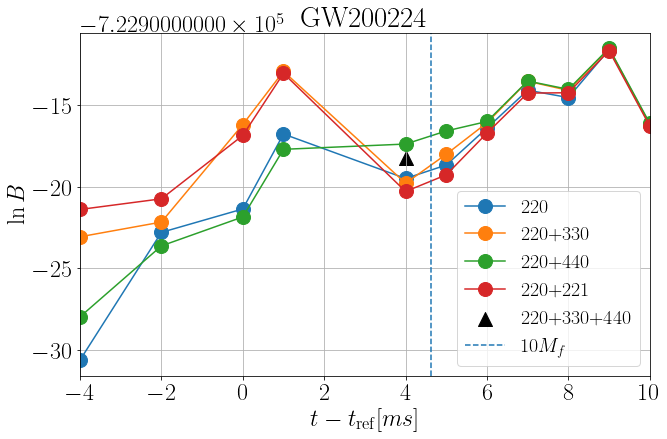

In [19]:
label=['220','220+330','220+440','220+221']
for i,dic in enumerate([lnb_220,lnb_330,lnb_440,lnb_221]):
    x,y=zip(*dic.items())
    plt.plot(x,y,label=label[i],marker='o')
plt.scatter(4,threemode.attrs['log_evidence'],marker='^',color='black',label='220+330+440')
plt.axvline(0.004632083954953592*1000,ls='--',label='$10M_f$')
plt.legend()
plt.title('GW200224')
plt.ylabel('$\ln B$')
plt.xlim(-4,10)
plt.xlabel('$t-t_\mathrm{ref}$ ms')